In [84]:
# описать функции для считывания картинки
# описать функцию для показывания картинки

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import random
from PIL import Image
import numpy as np
%matplotlib inline





# plt.imshow(map_img)
# plt.show



In [23]:
# в изначальной таблице в задаче перепутаны Longitude и Latitude
scaler = StandardScaler()

df = pd.read_csv("cities.csv", sep=",")
df.head(10)

,Longitude deg,Longitude min,Longitude sec,Latitude deg,Latitude min,Latitude sec,Population,Country,Capital,Name
0,55,45,21,37,37,4,12506468,Russia,1,Moscow
1,40,43,42,-73,-59,-39,8405837,USA,0,New York
2,38,53,42,-77,-2,-12,601723,USA,1,Washington
3,34,2,0,-118,-16,0,3976322,USA,0,Los Angeles
4,-35,-18,-10,149,8,30,356585,Australia,1,Canberra
5,-37,-49,-14,144,57,41,4529500,Australia,0,Melbourne
6,-33,-27,0,-70,-40,0,5128590,Chile,1,Santiago
7,39,56,0,116,24,0,21705000,China,1,Beijing
8,31,10,0,121,28,0,24152700,China,0,Shanghai
9,23,7,39,113,14,50,14000000,China,0,Guangzhou


In [24]:
def dms_to_dd(deg, _min, _sec):
    return deg + _min/60 + _sec/3600

df["Longitude"] = df.apply(lambda row: dms_to_dd(row["Latitude deg"],
                                                 row["Latitude min"],
                                                 row["Latitude sec"]), axis=1)

df["Latitude"] = df.apply(lambda row: dms_to_dd(row["Longitude deg"],
                                                 row["Longitude min"],
                                                 row["Longitude sec"]), axis=1)

df = df.drop(columns=["Longitude deg", "Longitude min", "Longitude sec",
                 "Latitude deg", "Latitude min", "Latitude sec"])

In [61]:
df_mil_cit = df[df["Population"] >= 1_000_000].copy()
df_mil_cit["Pop_norm"] = scaler.fit_transform(df_mil_cit[["Population"]])
df_mil_cit["x_pixel"] = df_mil_cit[["Longitude"]].apply(lambda row: (row + 180) * (1280 / 360), axis=1) 
df_mil_cit["y_pixel"] = df_mil_cit[["Latitude"]].apply(lambda row: 644 - (90 - row) * (644 / 180), axis=1) 

df_mil_cit.head(10)

,Population,Country,Capital,Name,Longitude,Latitude,Pop_norm,x_pixel,y_pixel
0,12506468,Russia,1,Moscow,37.617778,55.755833,0.075656,773.752099,521.481981
1,8405837,USA,0,New York,-73.994167,40.728333,-0.472995,376.909630,467.716926
3,3976322,USA,0,Los Angeles,-118.266667,34.033333,-1.065648,219.496296,443.763704
5,4529500,Australia,0,Melbourne,144.961389,-37.820556,-0.991635,1155.418272,186.686457
6,5128590,Chile,1,Santiago,-70.666667,-33.450000,-0.911479,388.740741,202.323333
7,21705000,China,1,Beijing,116.400000,39.933333,1.306388,1053.866667,464.872593
8,24152700,China,0,Shanghai,121.466667,31.166667,1.633882,1071.881481,433.507407
9,14000000,China,0,Guangzhou,113.247222,23.127500,0.275485,1042.656790,404.745056
10,6970105,Bangladesh,1,Dhaka,90.366667,23.700000,-0.665091,961.303704,406.793333
11,23500000,Pakistan,0,Karachi,67.010000,24.860000,1.546553,878.257778,410.943556


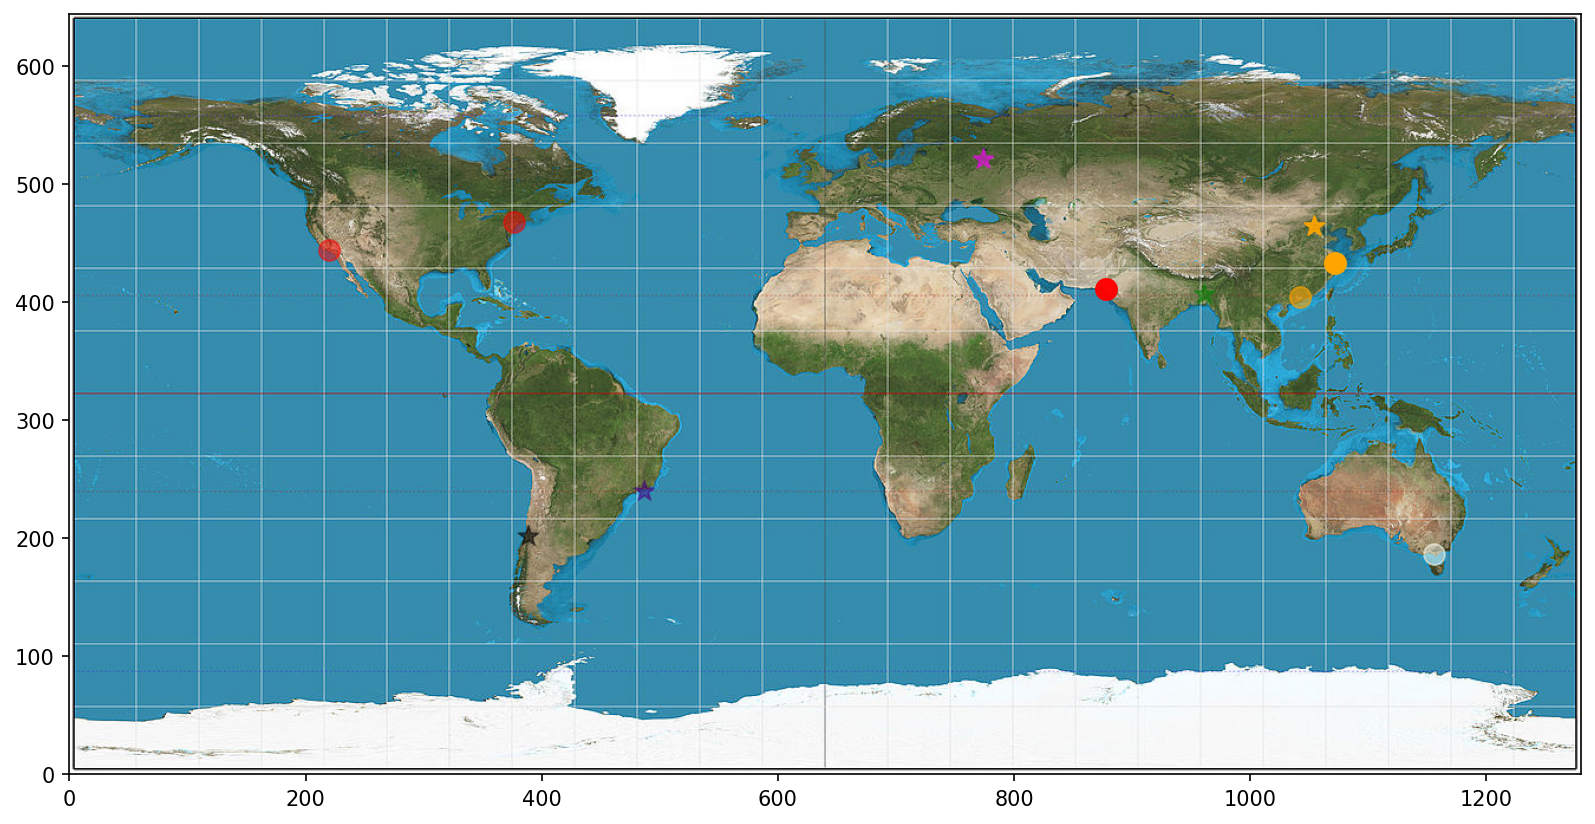

In [80]:
def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

fig, axes = plt.subplots(figsize=(13, 8), dpi=150)
colors = {"Russia":"#FF00FF", "USA":"red", "Chile":"black", "China":"orange", "Bangladesh":"green", "Pakistan":"red", "Brasil":"#4B0082", "Australia":"#FFFFF0"}

# for country in df_mil_cit["Country"].drop_duplicates():
#     colors[country] = random_hex_color()

with open("world.jpg", "rb") as map_file:
    map_img = plt.imread(map_file)

height, width = map_img.shape[:2]
axes.imshow(
    map_img,
    extent=[0, width, 0, height],   # [xmin, xmax, ymin, ymax]
    origin="upper",        # начало координат сверху
    zorder=0
)


for x, y, capital, population, country in zip(df_mil_cit["x_pixel"], df_mil_cit["y_pixel"], df_mil_cit["Capital"], df_mil_cit["Population"], df_mil_cit["Country"]):
    A = population/df_mil_cit["Population"].max() if population/df_mil_cit["Population"].max() > 0.5 else 0.5
    if capital == 1:
        axes.scatter(x, y, color=colors[country], marker="*", zorder=5, s=100, alpha=A)
    else:
        axes.scatter(x, y, color=colors[country], marker="o", zorder=5, s=100, alpha=A)

axes.set_xlim(0, width)
axes.set_ylim(0, height)
# axes.axis("off")

plt.show()

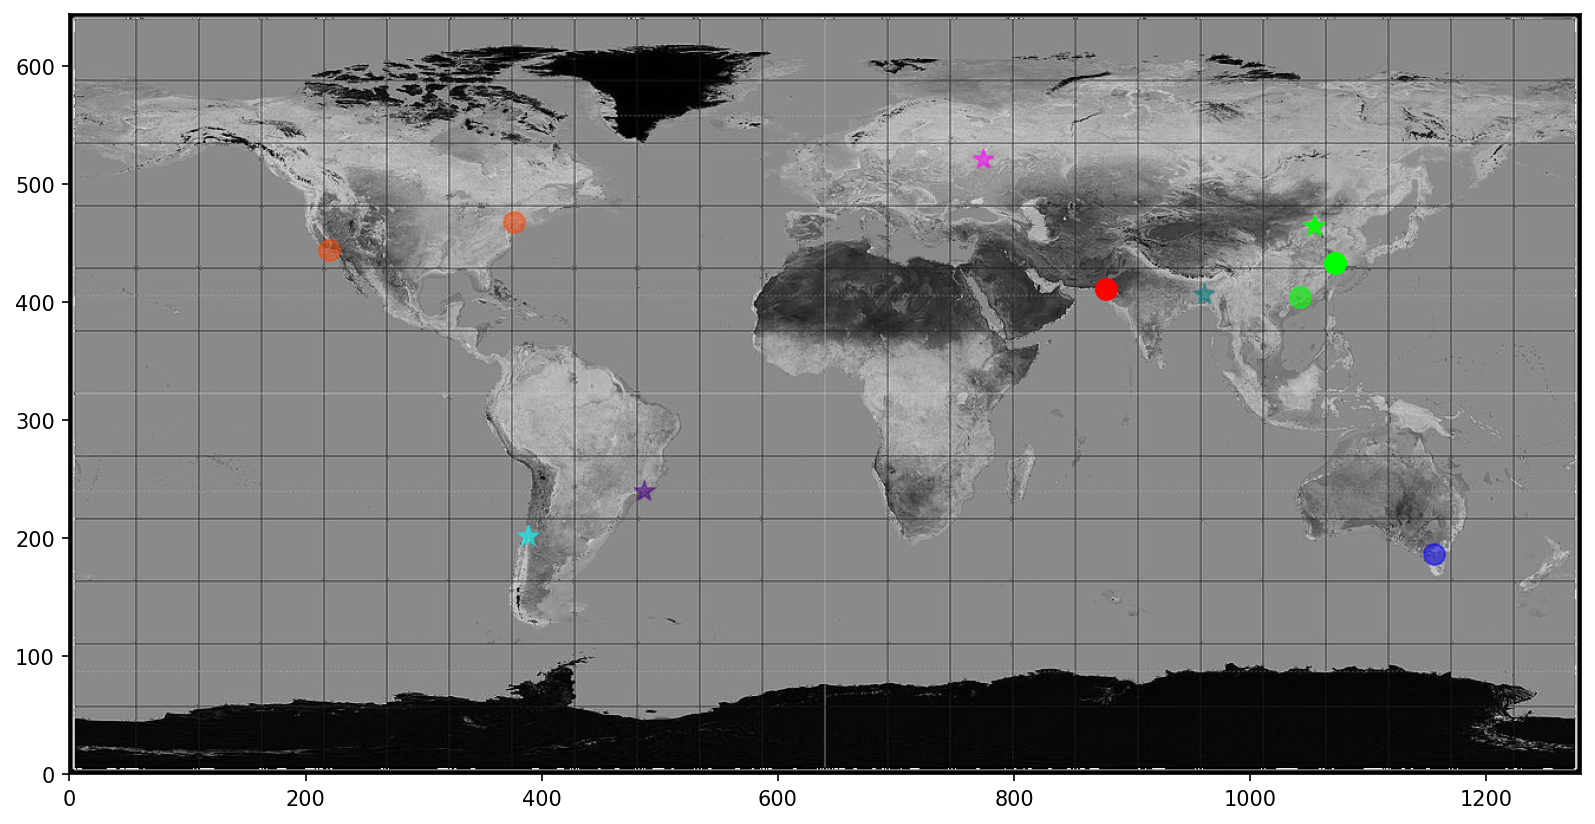

In [89]:
def random_hex_color():
    return "#{:06x}".format(random.randint(0, 0xFFFFFF))

fig, axes = plt.subplots(figsize=(13, 8), dpi=150)
colors = {"Russia":"#FF00FF", "USA":"#FF4500", "Chile":"#00FFFF", "China":"#00FF00", "Bangladesh":"#008080", "Pakistan":"red", "Brasil":"#4B0082", "Australia":"#0000FF"}

# for country in df_mil_cit["Country"].drop_duplicates():
#     colors[country] = random_hex_color()

with open("world.jpg", "rb") as map_file:
    map_img = mpimg.imread(map_file)

# Конвертируем в градации серого через Pillow
map_img_gray = Image.fromarray((map_img * 255).astype(np.uint8)).convert("L")

# Превращаем обратно в массив NumPy
map_img_gray = np.array(map_img_gray)

height, width = map_img_gray.shape[:2]

axes.imshow(
    map_img_gray,
    extent=[0, width, 0, height],   # [xmin, xmax, ymin, ymax]
    origin="upper",        # начало координат сверху
    zorder=0,
    cmap="gray"
)


for x, y, capital, population, country in zip(df_mil_cit["x_pixel"], df_mil_cit["y_pixel"], df_mil_cit["Capital"], df_mil_cit["Population"], df_mil_cit["Country"]):
    A = population/df_mil_cit["Population"].max() if population/df_mil_cit["Population"].max() > 0.5 else 0.5
    if capital == 1:
        axes.scatter(x, y, color=colors[country], marker="*", zorder=5, s=100, alpha=A)
    else:
        axes.scatter(x, y, color=colors[country], marker="o", zorder=5, s=100, alpha=A)

axes.set_xlim(0, width)
axes.set_ylim(0, height)
# axes.axis("off")

plt.show()